## slice leakage slice grappa without CAIPI
###### Author: Zimu Huo
###### Date: 06.2022

The slice-leakage is an artefact where the information from one slice is unintentionally transmitted to another slice during reconstruction. For example, if slice A contains apples and slice B contains bananas, any bananas found on slice A would be considered as slice leakage. The current method involves using a Monte Carlo simulation to impose unique frequency modulations on each slice. After reconstructions, the slice leakage can be determined by quantifying the frequency modulations on each individual slice. For example, if we add a 4 Hz modulation on slice A and a 6 Hz modulation on slice B, any 6 Hz component found on slice A after the reconstruction could be used to indicate slice leakage.

-------------------------------------------------------------------------
References
    
    [1] 
    Author: Steen Moeller et al. 
    Title: Signal Leakage(L-Factor) as a Measure for Parallel Imaging Performance Among Simultaneously Multi-Slice (SMS) Excited & Acquired Signals
    Link: https://archive.ismrm.org/2012/0519.html
    

In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
import util.mask as undersample
from util.fft import *
import util.simulator as simulator
import util.phantom as phantom
from util.gfactor import *
from tqdm.notebook import tqdm
from util.zpad import *
from scipy import io
import util.simulator as simulator
from util.spsg import * 

In [2]:
slice1 = np.load("../lib/slice1_grappa1.npy")
slice2 = np.load("../lib/slice2_grappa1.npy")
slice3 = np.load("../lib/slice3_grappa1.npy")
slice4 = np.load("../lib/slice4_grappa1.npy")
acc = np.concatenate((slice1[...,None], slice2[...,None], slice3[...,None], slice4[...,None]), -1)
ny, nx, nc , ns = acc.shape

In [3]:
from tqdm import tqdm
nt = 100
sample_rate = nt
leakage = np.zeros((ny, nx, ns, nt), dtype = complex)
for i in tqdm(range(nt)):
    cycle = np.arange(0,1,1/ns) * 2* np.pi
    shift = cycle*ny/(2*np.pi)
    fakeacc = np.zeros(acc.shape, dtype = complex)
    fakeacc[...,0]= (1+0.1*np.cos(2*4*1*np.pi*i/sample_rate))*acc[...,0]
    fakeacc[...,1]= (1+0.1*np.cos(2*4*2*np.pi*i/sample_rate))*acc[...,1]
    fakeacc[...,2]= (1+0.1*np.cos(2*4*3*np.pi*i/sample_rate))*acc[...,2]
    fakeacc[...,3]= (1+0.1*np.cos(2*4*4*np.pi*i/sample_rate))*acc[...,3]
    fakembdata = fft2c(simulator.multiSliceCAIPI(ifft2c(fakeacc), cycle, ns))
    fakeacc = fft2c(simulator.singleSliceFov(ifft2c(fakeacc),shift))
    recon = spsg(fakembdata,simulator.acs(fakeacc,(32,32)))
    recon = fft2c(simulator.singleSliceFov(ifft2c(recon),-shift))
    #leakage[...,i] =  np.mean(ifft2c(recon), 2)
    leakage[...,i] =  rsos(ifft2c(recon))

100%|████████████████████████████████████████| 100/100 [1:29:30<00:00, 53.71s/it]


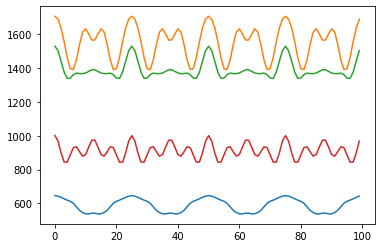

In [4]:
plt.plot(np.abs((leakage[60,60,0,:])))
plt.plot(np.abs((leakage[60,60,1,:])))
plt.plot(np.abs((leakage[60,60,2,:])))
plt.plot(np.abs((leakage[60,60,3,:])))

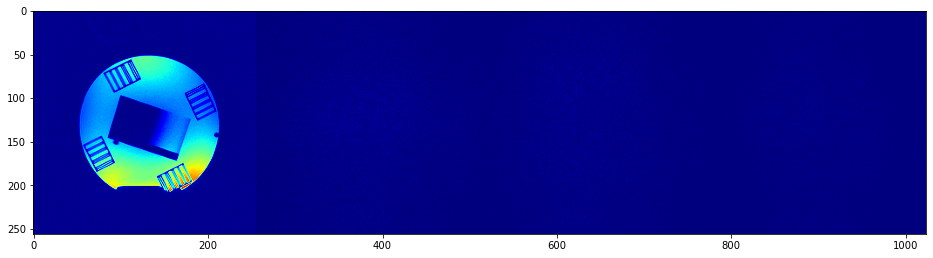

In [5]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [54]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps1 = maps
plt.figure(figsize = (16,12))
plt.imshow(np.abs(maps1).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()          

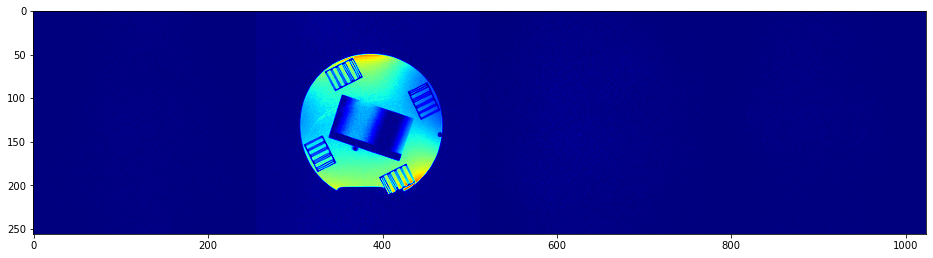

In [6]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [58]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps2 = maps
plt.figure(figsize = (16,12))
plt.imshow(np.abs(maps2).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()          

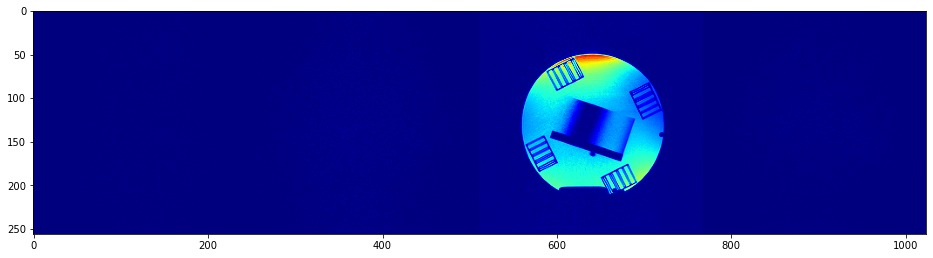

In [7]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [62]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps3 = maps
plt.figure(figsize = (16,12))
plt.imshow(np.abs(maps3).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()          

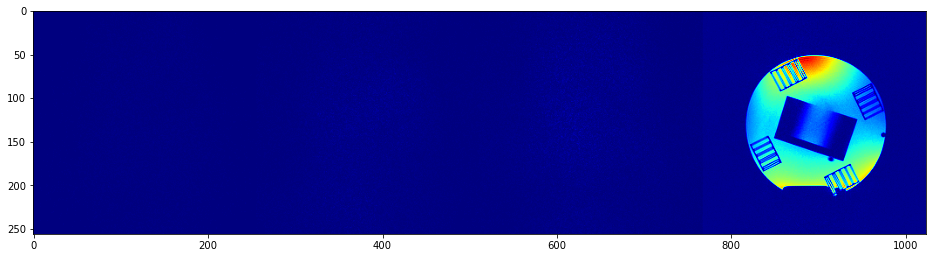

In [8]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [66]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))

maps4 = maps
plt.figure(figsize = (16,12))
plt.imshow(np.abs(maps4).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()          

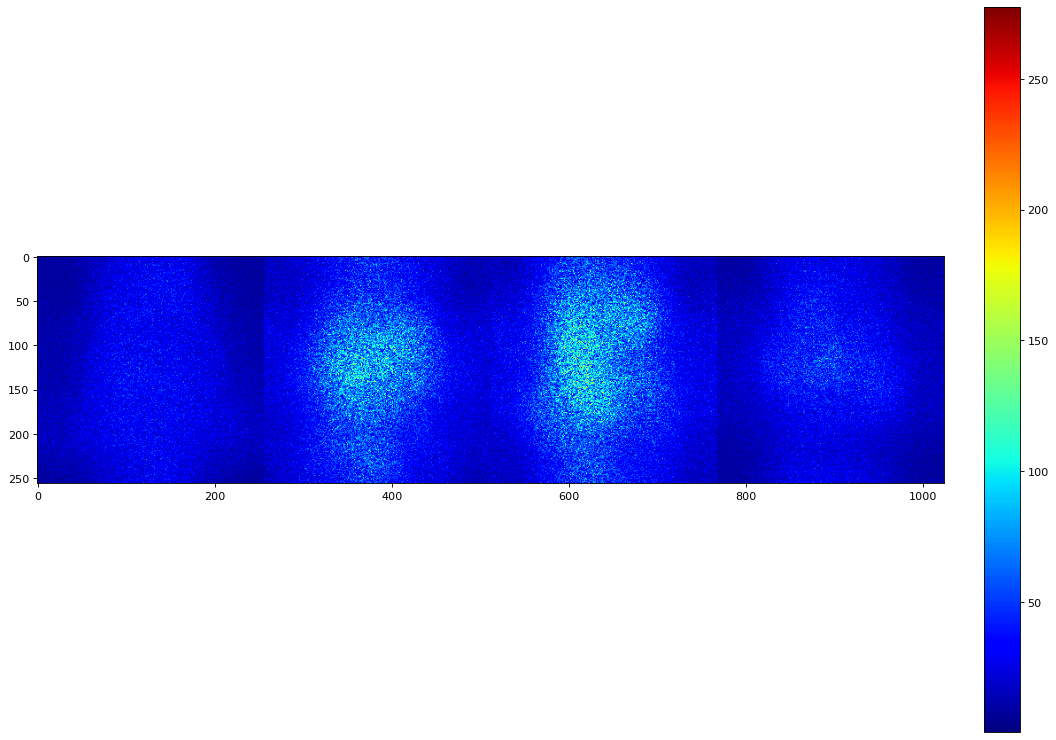

In [9]:
slice1 = maps2[:,:,0] + maps3[:,:,0]+maps4[:,:,0]
slice2 = maps1[:,:,1] + maps3[:,:,1]+maps4[:,:,1]
slice3 = maps1[:,:,2] + maps2[:,:,2]+maps4[:,:,2]
slice4 = maps1[:,:,3] + maps2[:,:,3]+maps3[:,:,3]
plt.figure(figsize = (16,12),dpi=80)
tf = plt.imshow(np.abs(np.concatenate((slice1, slice2, slice3, slice4),-1)).reshape(ny,-1, order = "F"),cmap='jet')
plt.colorbar(tf, fraction=0.046, pad=0.04)